# Table of Contents
1. [Dataset Glimpse](#glimpse)
2. []
3. [User Related Analysis](#userAnalysis)
4. [Product Related Analysis](#productAnalysis)
5. [Order Related Analysis](#orderAnalysis)
6. [Baseline Models](#benchmark)

In [7]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

import os
%matplotlib inline


In [142]:
IDIR = '.'
df_order_products_train = pd.read_csv(os.path.join(IDIR, "order_products__train.csv"))
df_order_products_prior = pd.read_csv(os.path.join(IDIR, "order_products__prior.csv"))
df_orders = pd.read_csv(os.path.join(IDIR, "orders.csv"))
df_products = pd.read_csv(os.path.join(IDIR, "products.csv"))
df_aisles = pd.read_csv(os.path.join(IDIR, "aisles.csv"))
df_departments = pd.read_csv(os.path.join(IDIR, "departments.csv"))

# A Glimpse of the Dataset <a id="glimpse"></a>

In [9]:
df_order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [11]:
df_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [12]:
df_products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


![image.png](https://kaggle2.blob.core.windows.net/forum-message-attachments/183176/6539/instacartFiles.png)

## What is the scale of the dataset?

In [36]:
print("Unique products: {}".format(len(df_products.product_id.unique())))

Unique products: 49688


In [37]:
print("Unique users: {}".format(len(df_orders.user_id.unique())))

Unique users: 206209


In [14]:
print(df_orders.shape)

(3421083, 7)


The dataset contains 3421083 orders from 206209 different users.  49688 different products have been purchased.

In [18]:
df_orders[df_orders.user_id == 1]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


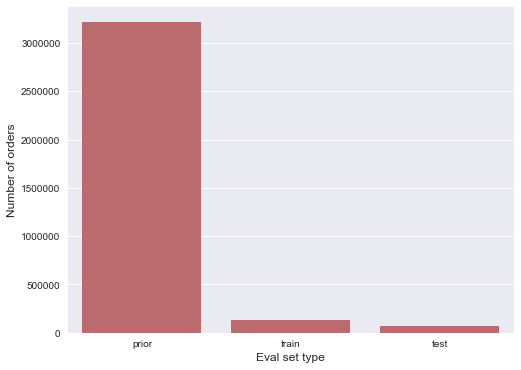

In [40]:
eval_cnt = df_orders.eval_set.value_counts()

plt.figure(figsize=(8,6))
sns.barplot(eval_cnt.index, eval_cnt.values, alpha = 0.9, color=color[0])
plt.ylabel('Number of orders', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.show()

In [32]:
df_orders.groupby("eval_set")["user_id"].unique().apply(len)

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

Out of the 206209 users, the last purchase of 131209 users are given as training, and the rest 75000 users are given as targets for prediction.

In [ ]:
Product related:
1. buying count ranking
2. reorder ratio ranking

In [ ]:
User related:
1. order history length
2. reorder ratio histogram

In [ ]:
Order related:
1. Temporary pattern (day of week, hour of day)
2. basket size histogram
3. day since last order distribution

In [ ]:
Benchmark: predict as the same as last order

# User Related Analysis
<a id="userAnalysis"></a>
## How many previous orders do we have for each user?

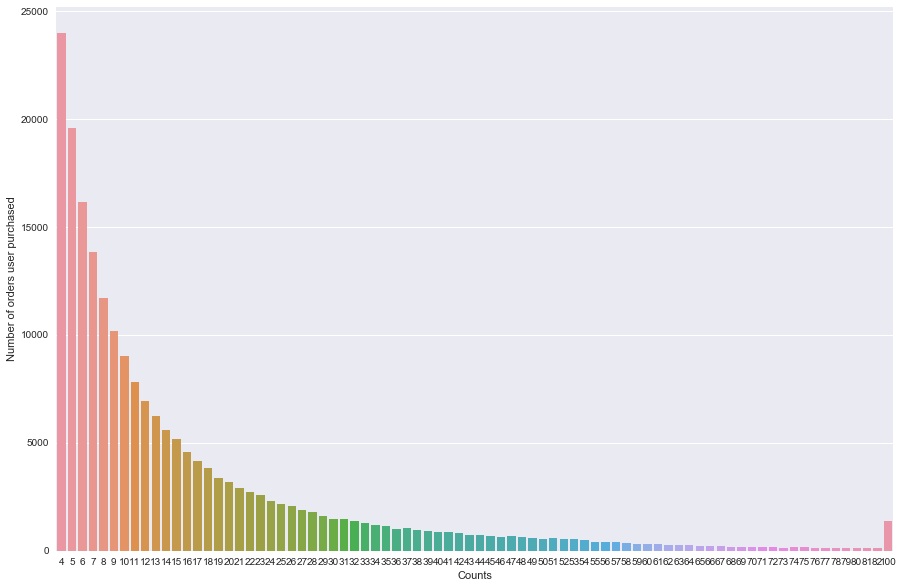

In [61]:
#order history length
order_length_cnt = df_orders.groupby("user_id")["order_number"].aggregate(max).value_counts()
cut_off = 80
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(order_length_cnt.index[:cut_off], order_length_cnt.values[:cut_off])
plt.ylabel('Number of orders user purchased')
plt.xlabel('Counts')

In [62]:
print("Average number of orders for users:{}".format(df_orders.groupby("user_id")["order_number"].aggregate(max).mean()))


Average number of orders for users:16.590367054784224


# Order Related Analysis
<a id="orderAnalysis"></a>
## How many products each order contains?

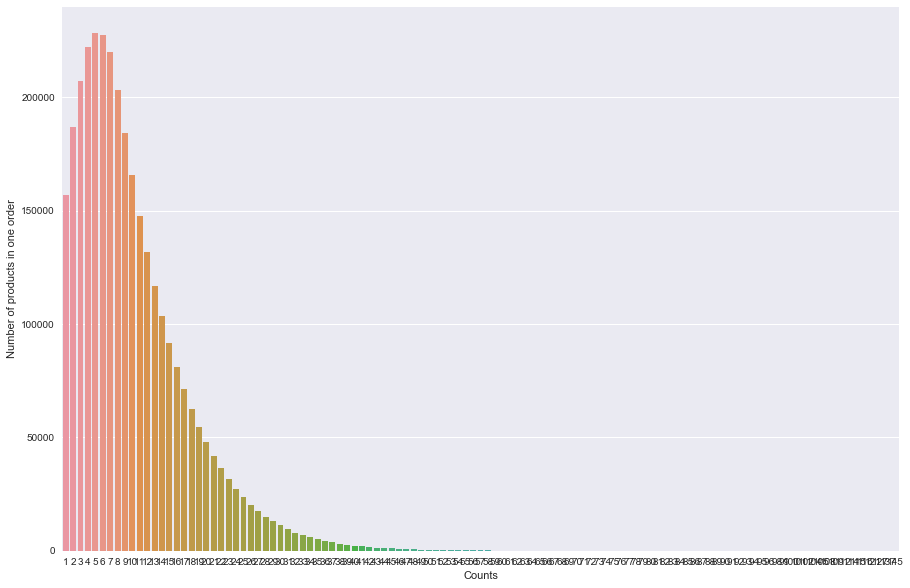

In [57]:
#basket size histogram
basket_size_cnt = df_order_products_prior.groupby("order_id")["add_to_cart_order"].aggregate(max).value_counts()

f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(basket_size_cnt.index, basket_size_cnt.values)
plt.ylabel('Counts')
plt.xlabel('Number of products in one order')

In [60]:
print("Average basket size:{}".format(df_order_products_prior.groupby("order_id")["add_to_cart_order"].aggregate(max).mean()))

Average basket size:10.088883421247614


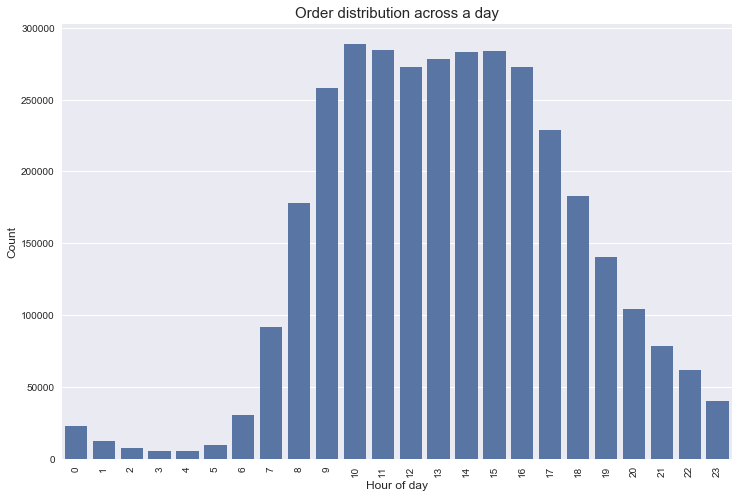

In [64]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=df_orders, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Order distribution across a day", fontsize=15)
plt.show()

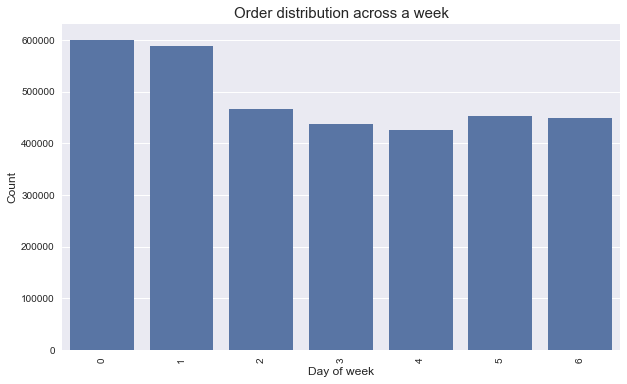

In [66]:
plt.figure(figsize=(10,6))
sns.countplot(x="order_dow", data=df_orders, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Order distribution across a week", fontsize=15)
plt.show()

In [70]:
df_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [143]:
df_order_products_train = pd.merge(df_order_products_train, df_orders, on='order_id', how='left')
grouped_df = df_order_products_train.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
grouped_df.head()

,order_dow,order_hour_of_day,reordered
0,0,0,0.577806
1,0,1,0.587189
2,0,2,0.593341
3,0,3,0.553435
4,0,4,0.599455


In [144]:
grouped_df = grouped_df.pivot(index='order_dow', columns = 'order_hour_of_day', values = 'reordered')
grouped_df.head()

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,0.577806,0.587189,0.593341,0.553435,0.599455,0.607201,0.653686,0.677985,0.665738,0.635068,...,0.598129,0.591321,0.601673,0.614780,0.587774,0.609967,0.622931,0.641041,0.624711,0.605878
1,0.622407,0.550877,0.511111,0.664921,0.626016,0.597846,0.664765,0.656859,0.654519,0.642871,...,0.598679,0.570853,0.576848,0.572953,0.573926,0.603978,0.546328,0.602629,0.574086,0.586061
2,0.589645,0.621521,0.596045,0.567485,0.637427,0.629555,0.630402,0.639769,0.623237,0.604619,...,0.584259,0.586026,0.566976,0.577985,0.572924,0.588681,0.591452,0.575623,0.593591,0.567022
3,0.610324,0.507788,0.615730,0.553797,0.469101,0.638132,0.672999,0.624746,0.633493,0.621520,...,0.583432,0.572695,0.567665,0.570108,0.586399,0.560852,0.589400,0.579552,0.570420,0.573351
4,0.530852,0.575233,0.540659,0.593985,0.617761,0.666062,0.683973,0.635435,0.631235,0.592284,...,0.591776,0.593674,0.588828,0.606985,0.589294,0.594579,0.587502,0.609812,0.592511,0.591469


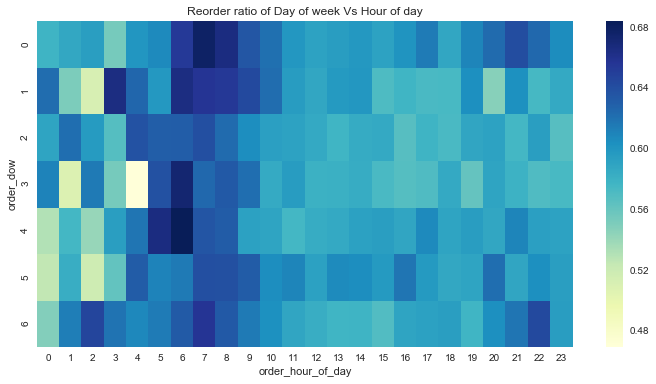

In [166]:
plt.figure(figsize=(12,6))
sns.heatmap(grouped_df, cmap="YlGnBu")
plt.title("Reorder ratio of Day of week Vs Hour of day")
plt.show()

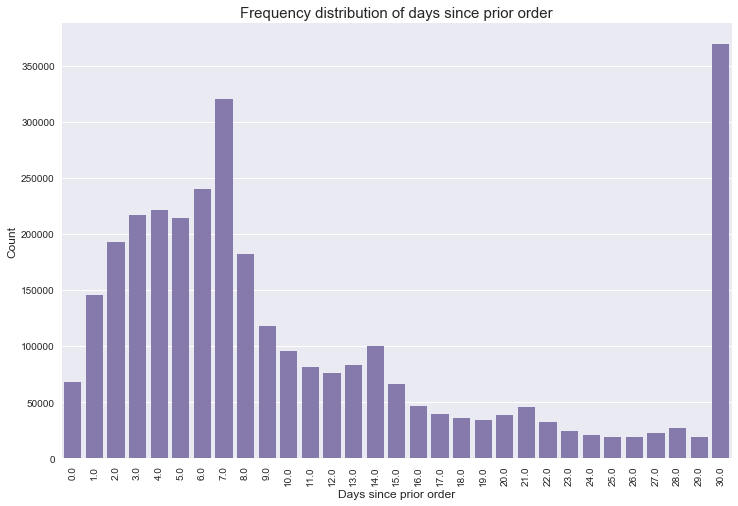

In [67]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=df_orders, color=color[3])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution of days since prior order", fontsize=15)
plt.show()

# Product Related Analysis <a id="productAnalysis"></a>

In [43]:
# popularity of the products
df_order_products_prior = pd.merge(df_order_products_prior, df_products, on = 'product_id', how = 'left')
top_products = df_order_products_prior['product_name'].value_counts().reset_index().head(20)
top_products.columns = ['product_name', 'frequency_count']

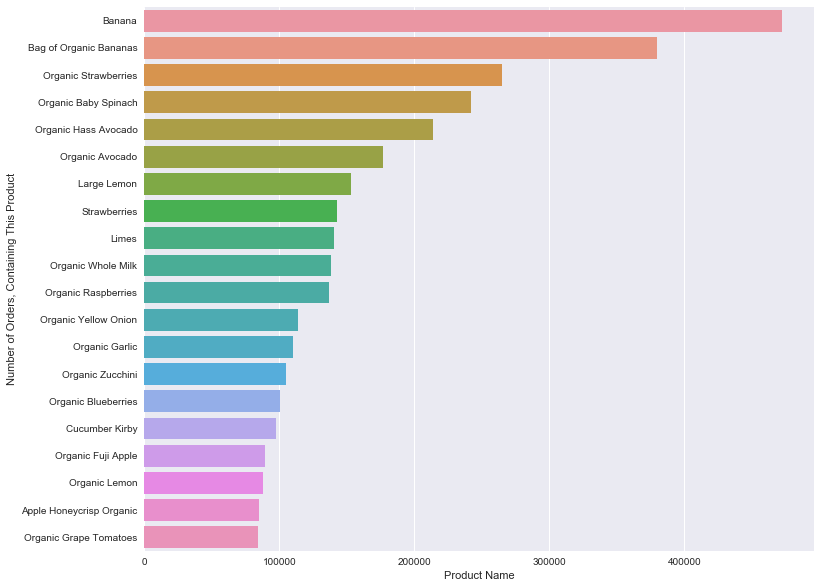

In [47]:
f, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='horizontal')
sns.barplot(top_products.frequency_count, top_products.product_name)
plt.ylabel('Product Name')
plt.xlabel('Number of Orders Containing This Product')

In [147]:
df_order_details = pd.merge(df_order_products_prior, df_orders, on = "order_id")
df_order_details.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0


In [149]:
df_product_info = df_order_details.groupby('product_id')['reordered', 'order_id'].aggregate({'reordered': sum, 'order_id': len})

In [151]:
df_product_info.rename(columns={'order_id': 'order_cnt'}, inplace = True)
df_product_info.head()

,reordered,order_cnt
product_id,,
1,1136,1852
2,12,90
3,203,277
4,147,329
5,9,15


In [152]:
df_product_info['reorder_rate'] = df_product_info.reordered/df_product_info.order_cnt

In [153]:
high_reorder = df_product_info[df_product_info.order_cnt > 100].sort_values('reorder_rate', ascending = False)
high_reorder.head()

,reordered,order_cnt,reorder_rate
product_id,,,
27740,93,101,0.920792
38251,99,111,0.891892
10236,113,129,0.875969
20598,98,112,0.875000
35496,389,451,0.862528


In [157]:
df_products.set_index('product_id', inplace = True)
high_reorder = high_reorder.join(df_products)
high_reorder.head()

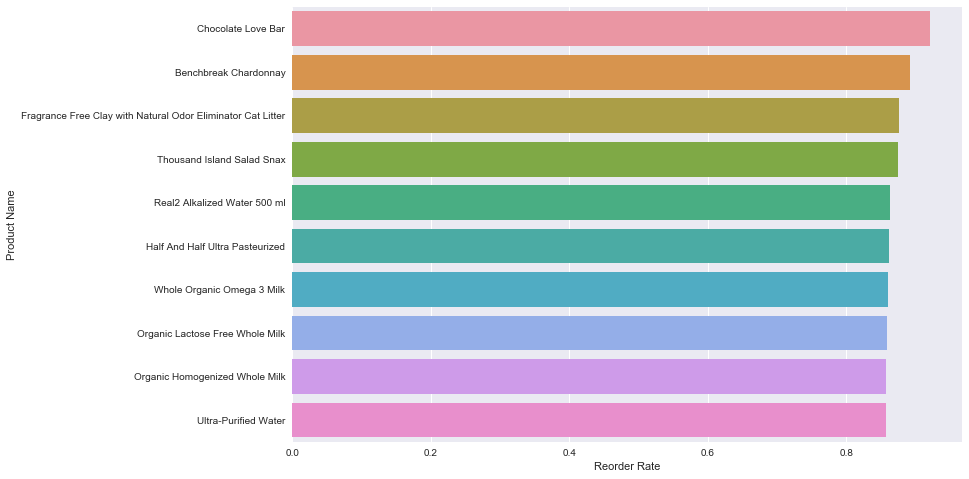

In [164]:
top = 10
plt.figure(figsize=(12, 8))
sns.barplot(high_reorder.reorder_rate[:top], high_reorder.product_name[:top])
plt.xlabel('Reorder Rate')
plt.ylabel('Product Name')
plt.title('Products with highest reorder ratio')

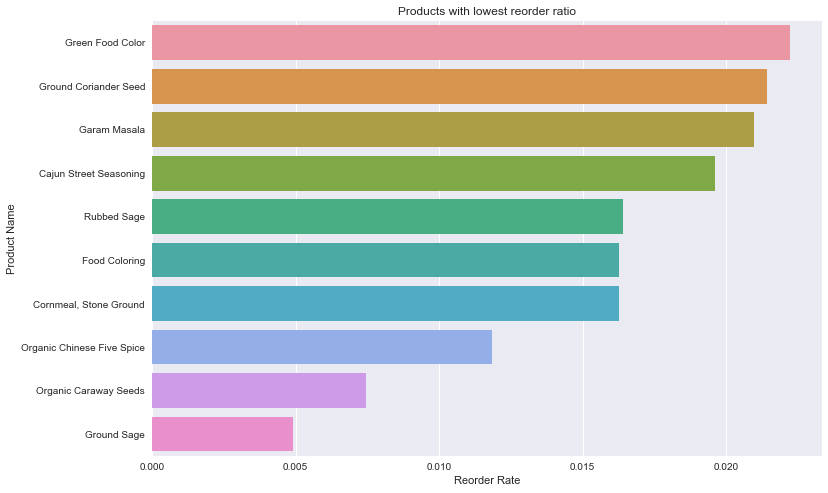

In [165]:
top = 10
plt.figure(figsize=(12, 8))
sns.barplot(high_reorder.reorder_rate[-top:], high_reorder.product_name[-top:])
plt.xlabel('Reorder Rate')
plt.ylabel('Product Name')
plt.title('Products with lowest reorder ratio')

C:\Users\py\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  app.launch_new_instance()
C:\Users\py\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


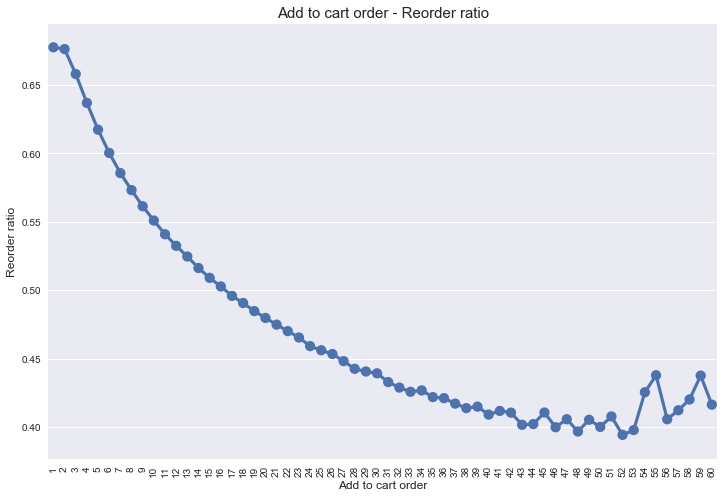

In [50]:
# Add to Cart - Reorder ratio:
df_order_products_prior['add_to_cart_order_mod'] = df_order_products_prior['add_to_cart_order'].copy()
df_order_products_prior['add_to_cart_order_mod'].iloc[df_order_products_prior['add_to_cart_order_mod']>60] = 60
grouped_df = df_order_products_prior.groupby(['add_to_cart_order_mod'])['reordered'].aggregate('mean').reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['add_to_cart_order_mod'].values, grouped_df['reordered'].values, alpha=0.8, color=color[0])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

Looks like products added to the cart earlier have a higher reorder ratio. This makes sense because users usually will buy their target products first and then may look for some new products available.

# Benchmark Model <a id="benchmark"></a>

In [77]:
df_order_products_prior = pd.merge(df_order_products_prior, df_orders, on = "order_id")
test_orders = df_orders[df_orders.eval_set == 'test']

In [81]:
# Repeat last order (Public Leaderboard Score 0.328)

test_history = df_order_products_prior[(df_order_products_prior.user_id.isin(test_orders.user_id))]
last_orders = test_history.groupby('user_id')['order_number'].max()

left = pd.merge(last_orders.reset_index(),test_history, on=['user_id', 'order_number'], how='inner')[['user_id', 'product_id']]
t = pd.merge(left, test_orders[['user_id', 'order_id']],on='user_id', how='left')
t = t.groupby('order_id')['product_id'].apply(lambda x: ' '.join([str(e) for e in set(x)])).reset_index()  
t.columns = ['order_id', 'products']
#t.to_csv('baseline.csv', index=False)



In [82]:
t.head()

,order_id,products
0,17,13107 26429 39275 21463
1,34,2596 49191 44632 44912 47792 16083 23028 39475...
2,137,25890 44422 13740 34126 5134 23794 24852 2326 ...
3,182,10243 5479 33000 10025 37642 39275 40377 32109...
4,257,27104 11140 11782 29837 37646 2063 49235 24852...


Choose the top k most bought products for each user. (public score: 0.297 for k = 5)

In [87]:
user_product_count = test_history.groupby(["user_id", 'product_id'])["order_id"].count()

In [103]:
user_product_count.columns = ['count']

In [100]:
user_product_count = pd.DataFrame(user_product_count)

In [111]:
user_product_count.head()

count
user_id product_id       
3       248             1
        1005            1
        1819            3
        7503            1
        8021            1

In [117]:
sorted_count = user_product_count.sort_values('count', ascending=False).sort_index(level='user_id', sort_remaining=False)

In [122]:
top_k = 5
sorted_count.loc[3].index[:top_k]

Int64Index([39190, 47766, 21903, 17668, 9387], dtype='int64', name='product_id')

In [123]:
sorted_count.head()

count
user_id product_id       
3       39190          10
        47766           9
        21903           8
        17668           5
        9387            5

In [128]:
test_orders['products'] = test_orders.user_id.apply(lambda x: ' '.join([str(e) for e in sorted_count.loc[x].index[:top_k]]))

C:\Users\py\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [135]:
sub = test_orders[['order_id', 'products']].sort_values('order_id').reset_index()
sub.drop(['index'], axis = 1, inplace = True)
sub.head()

,order_id,products
0,17,13107 21463 21709 47766 38777
1,34,39180 47029 47792 39475 43504
2,137,23794 38689 41787 24852 25890
3,182,9337 39275 13629 27104 5479
4,257,49235 27104 24852 29837 27966


In [136]:
sub.to_csv('baseline.csv', index=False)